In [1]:
cd C:/Users/Watson Turbo/Desktop

C:\Users\Watson Turbo\Desktop


In [2]:
pwd

'C:\\Users\\Watson Turbo\\Desktop'

In [3]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#Create dataframes from FRED data
cpi = pd.read_csv("CPI.csv")
wti = pd.read_csv("WTI.csv")
ind = pd.read_csv("Industrial Production.csv")
debt = pd.read_csv("Debt.csv")

In [5]:
cpi.head()

,Date,CPI
0,1/1/1947,21.48
1,2/1/1947,21.62
2,3/1/1947,22.00
3,4/1/1947,22.00
4,5/1/1947,21.95


In [6]:
wti.head()

,Date,WTI
0,1/1/1947,1.62
1,2/1/1947,1.62
2,3/1/1947,1.62
3,4/1/1947,1.87
4,5/1/1947,1.87


In [7]:
ind.head()

,Date,Prod
0,1/1/1947,14.0679
1,2/1/1947,14.1510
2,3/1/1947,14.2341
3,4/1/1947,14.1233
4,5/1/1947,14.1787


In [8]:
debt.head()

,Date,Debt
0,1/1/1947,267.0
1,2/1/1947,268.8
2,3/1/1947,266.7
3,4/1/1947,265.0
4,5/1/1947,265.7


In [9]:
#Check date types
debt.dtypes, wti.dtypes, cpi.dtypes, ind.dtypes

(Date     object
 Debt    float64
 dtype: object, Date     object
 WTI     float64
 dtype: object, Date     object
 CPI     float64
 dtype: object, Date     object
 Prod    float64
 dtype: object)

In [10]:
#Convert Dates to be measurable
wti['Date'] = wti['Date'].astype('datetime64[ns]')
cpi['Date'] = cpi['Date'].astype('datetime64[ns]')
ind['Date'] = ind['Date'].astype('datetime64[ns]')
debt['Date'] = debt['Date'].astype('datetime64[ns]')

In [11]:
#Merge Dataframes based on Date
econ = pd.merge(wti, cpi)
econ = pd.merge(econ, ind)
econ = pd.merge(econ, debt)

In [12]:
econ.head()

,Date,WTI,CPI,Prod,Debt
0,1947-01-01,1.62,21.48,14.0679,267.0
1,1947-02-01,1.62,21.62,14.1510,268.8
2,1947-03-01,1.62,22.00,14.2341,266.7
3,1947-04-01,1.87,22.00,14.1233,265.0
4,1947-05-01,1.87,21.95,14.1787,265.7


In [13]:
# see if any columns have nulls
display(econ.isnull().any())

Date    False
WTI     False
CPI     False
Prod    False
Debt    False
dtype: bool

In [14]:
#Explore Stats
econ.describe(include='all')

,Date,WTI,CPI,Prod,Debt
count,869,869.000000,869.000000,869.000000,869.000000
unique,869,NaN,NaN,NaN,NaN
top,1995-01-01 00:00:00,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
first,1947-01-01 00:00:00,NaN,NaN,NaN,NaN
last,2019-05-01 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,25.269162,108.923838,58.640564,4597.646145
std,NaN,27.625947,76.907265,30.450577,6110.097682
min,NaN,1.620000,21.480000,13.569500,253.800000
25%,NaN,3.000000,31.280000,31.376000,308.900000


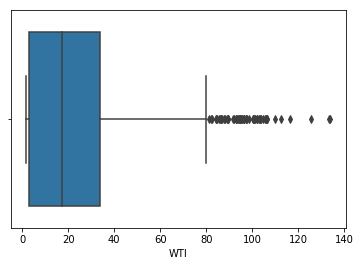

In [15]:
#Box Plot
sns.boxplot(x="WTI",data=econ)

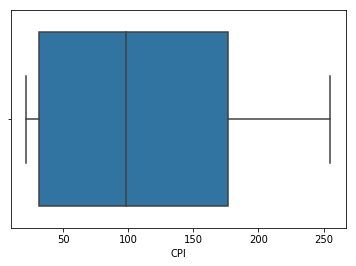

In [16]:
sns.boxplot(x="CPI",data=econ)

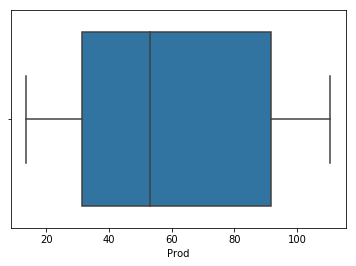

In [17]:
sns.boxplot(x="Prod",data=econ)

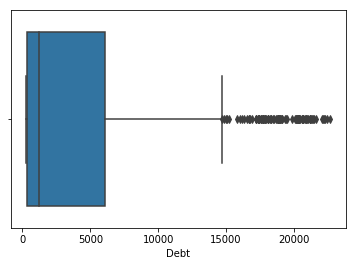

In [18]:
sns.boxplot(x="Debt",data=econ)

Interestingly enough, Debt and Oil boxplots show numerous outliers beyond the 75th percentile.

I would imagine these are both from recent spikes.

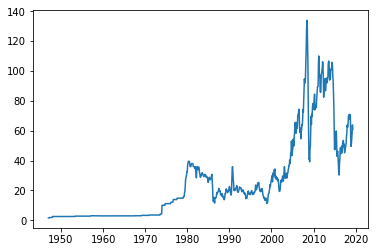

In [19]:
#Plot Oil Price with Matplotlib
from pandas import Series
x = econ['Date']
oil = econ['WTI']
plt.plot(x,oil)
plt.show()

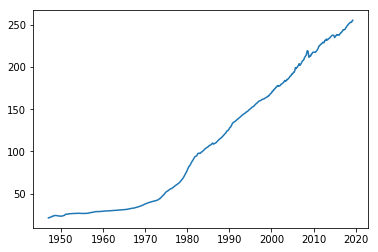

In [20]:
#Plot Inflation
cpi = econ['CPI']
plt.plot(x, cpi)
plt.show()

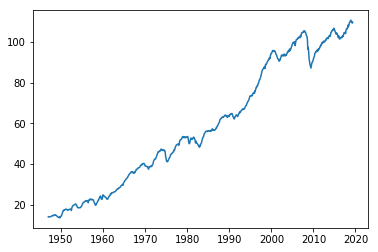

In [21]:
#Plot Industrial Production Index
prod = econ['Prod']
plt.plot(x, prod)
plt.show()

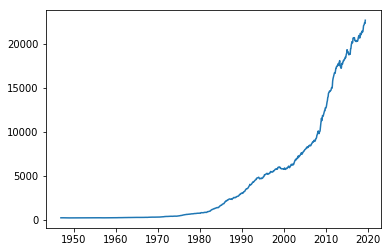

In [22]:
#Plot Federal Debt
debt = econ['Debt']
plt.plot(x, debt)
plt.show()

None of our data seems very stationary.
Therefore, we canot assume Constant Mean and Constant Variance.

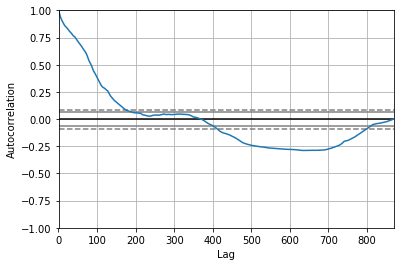

In [23]:
#Auto Correlation
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(oil)
plt.show()

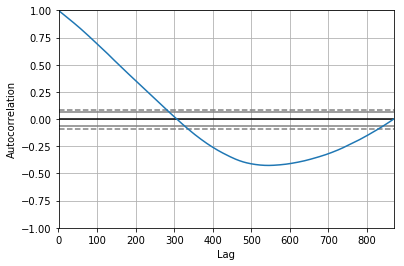

In [24]:
autocorrelation_plot(cpi)
plt.show()

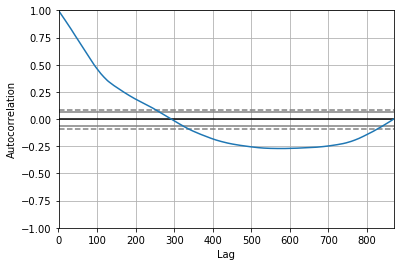

In [25]:
autocorrelation_plot(debt)
plt.show()

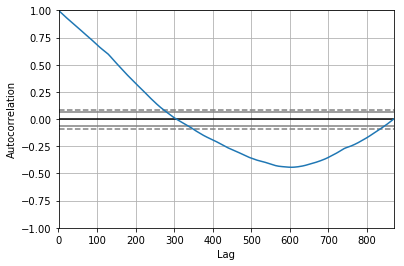

In [26]:
autocorrelation_plot(prod)
plt.show()

In [27]:
#Correlation Table
econ.corr()

,WTI,CPI,Prod,Debt
WTI,1.000000,0.839266,0.801016,0.814546
CPI,0.839266,1.000000,0.975032,0.903188
Prod,0.801016,0.975032,1.000000,0.840951
Debt,0.814546,0.903188,0.840951,1.000000


## Woah! All of these Economic Indicators are Highly correlated!

In [28]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [29]:
#Define Predictor Vairable X and Target Variable Y
x = econ[ ['WTI']]
y = econ[ ['CPI']]
#Fit the Model
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
#Obtain the prediction
Yhat=lm.predict(x)

In [31]:
#View Intercept and Slope
lm.intercept_, lm.coef_

(array([49.88460156]), array([[2.33641446]]))

In [32]:
#OIl Price = 49.88- 2.34 * CPI

C:\Users\Watson Turbo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


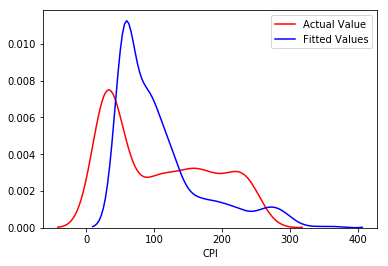

In [33]:
#Distribution Plot
ax1 = sns.distplot(econ['CPI'], hist=False, color="r", label="Actual Value")

sns.distplot(Yhat, hist=False, color="b", label="Fitted Values", ax=ax1)

In [34]:
# P Value of same dataframe, note it should match the Correlation Table
from scipy import stats
pearson_coef, p_value = stats.pearsonr(econ['WTI'], econ['CPI'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8392661214888024  with a P-value of P = 1.2013961885775618e-231


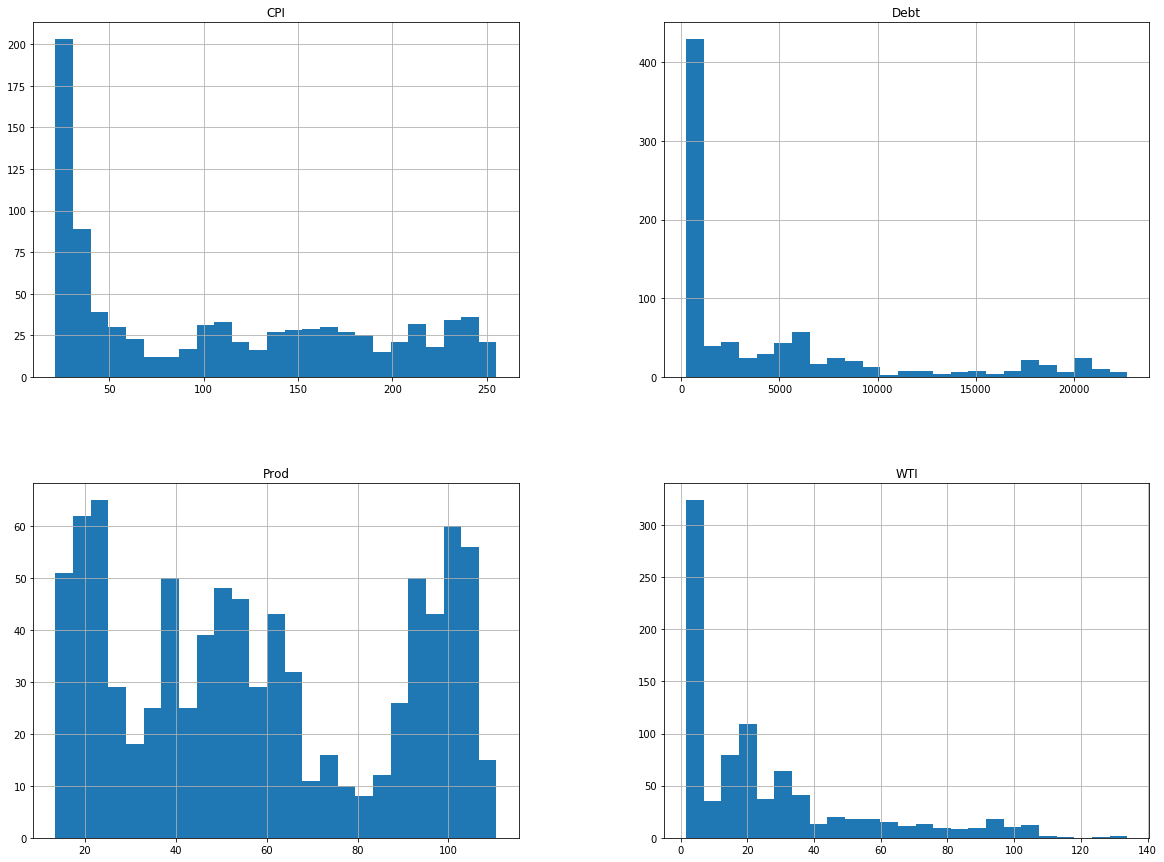

In [35]:
#Histogram
econ.hist(bins=25, figsize=(20,15))
plt.show()

(0, 415.06032200941735)

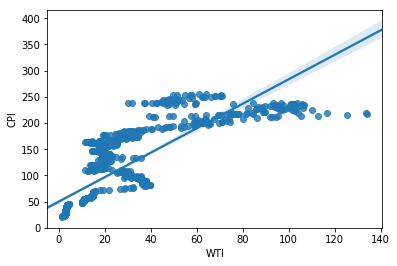

In [36]:
sns.regplot(x="WTI",y="CPI", data=econ)
plt.ylim(0,)

(0, 28345.01096468602)

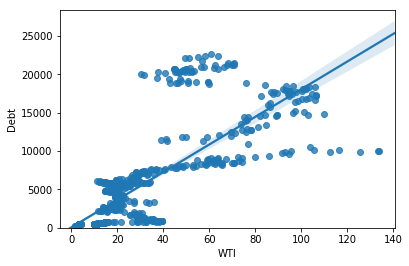

In [37]:
sns.regplot(x="WTI",y="Debt", data=econ)
plt.ylim(0,)

(0, 174.56046205712002)

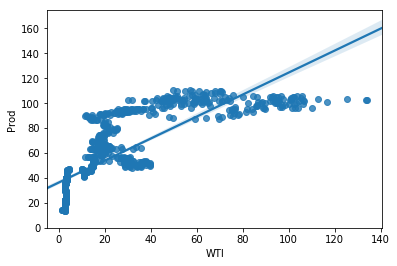

In [38]:
sns.regplot(x="WTI",y="Prod", data=econ)
plt.ylim(0,)

(0, 413.76058377453944)

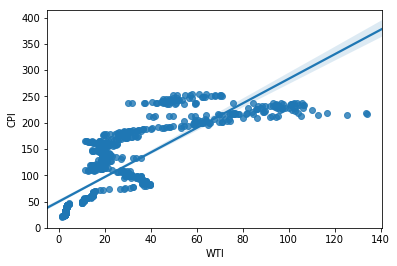

In [39]:
sns.regplot(x="WTI",y="CPI", data=econ)
plt.ylim(0,)

(0, 140.94219658185955)

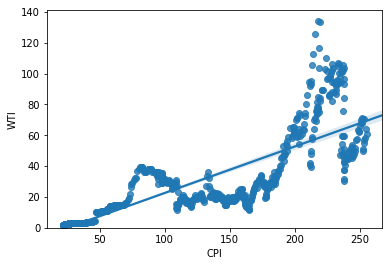

In [40]:
sns.regplot(x="CPI",y="WTI", data=econ)
plt.ylim(0,)

(0, 23980.256941527692)

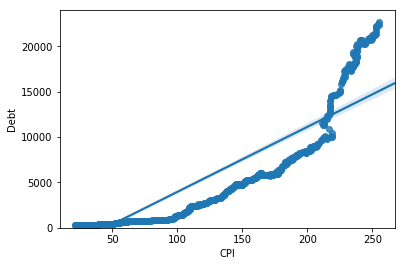

In [41]:
sns.regplot(x="CPI",y="Debt", data=econ)
plt.ylim(0,)

(0, 126.0682404587919)

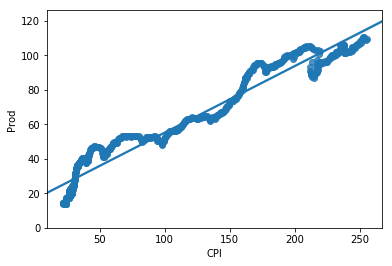

In [42]:
sns.regplot(x="CPI",y="Prod", data=econ)
plt.ylim(0,)

(0, 268.9043952572001)

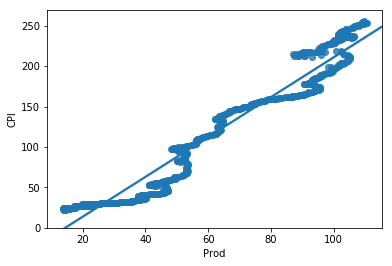

In [43]:
sns.regplot(x="Prod",y="CPI", data=econ)
plt.ylim(0,)

(0, 141.29304884215145)

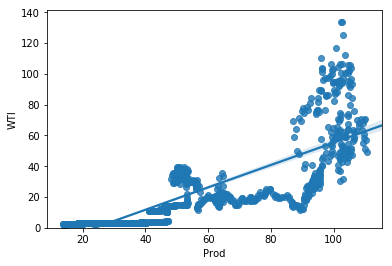

In [44]:
sns.regplot(x="Prod",y="WTI", data=econ)
plt.ylim(0,)

(0, 24051.733177543905)

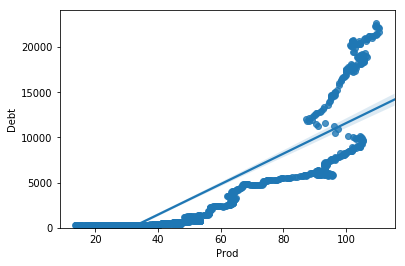

In [45]:
sns.regplot(x="Prod",y="Debt", data=econ)
plt.ylim(0,)

(0, 149.90595573030353)

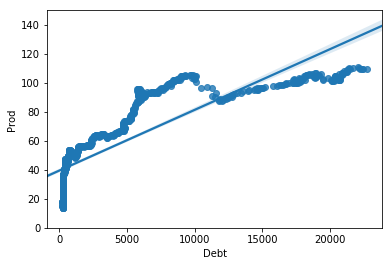

In [46]:
sns.regplot(x="Debt",y="Prod", data=econ)
plt.ylim(0,)

(0, 140.58768499769468)

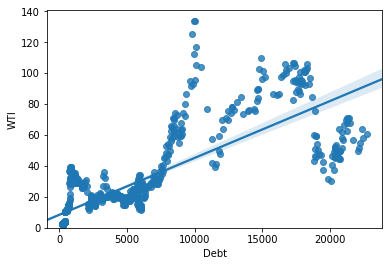

In [47]:
sns.regplot(x="Debt",y="WTI", data=econ)
plt.ylim(0,)

(0, 352.7295334150637)

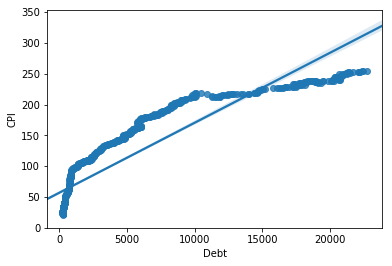

In [48]:
sns.regplot(x="Debt",y="CPI", data=econ)
plt.ylim(0,)

#Residual Plot to determine if Linear Regression is appropriate

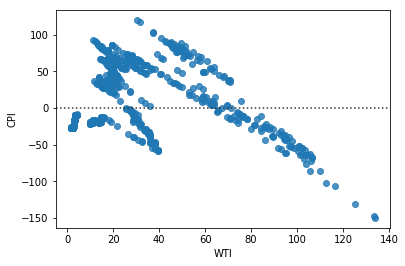

In [49]:
#
sns.residplot(econ['WTI'], econ['CPI'], robust=True)

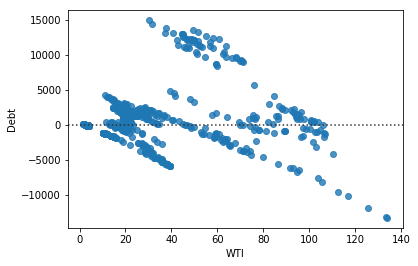

In [50]:
#
sns.residplot(econ['WTI'], econ['Debt'], robust=True)

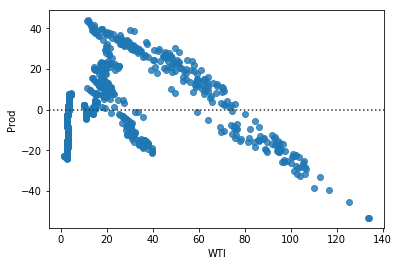

In [51]:
#
sns.residplot(econ['WTI'], econ['Prod'], robust=True)

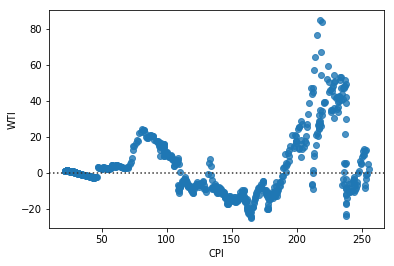

In [52]:
#
sns.residplot(econ['CPI'], econ['WTI'], robust=True)

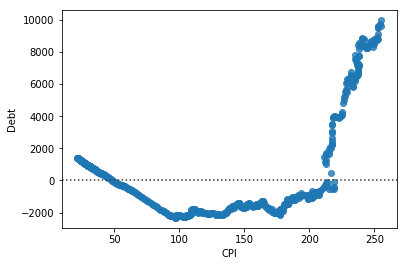

In [53]:
#
sns.residplot(econ['CPI'], econ['Debt'], robust=True)

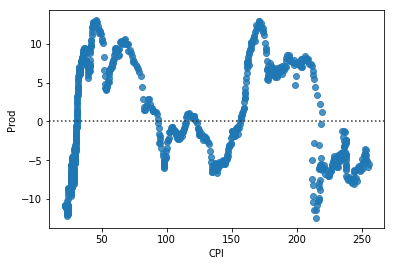

In [54]:
#
sns.residplot(econ['CPI'], econ['Prod'], robust=True)

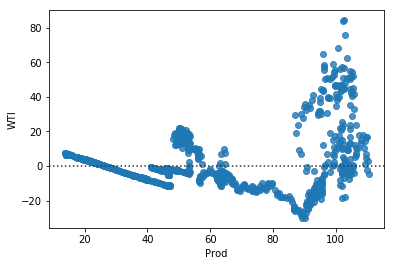

In [55]:
#
sns.residplot(econ['Prod'], econ['WTI'], robust=True)

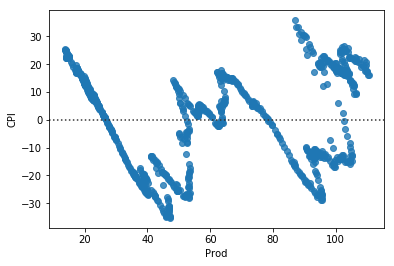

In [56]:
#
sns.residplot(econ['Prod'], econ['CPI'], robust=True)

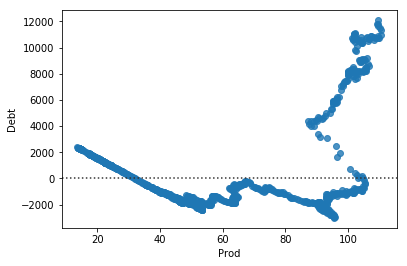

In [57]:
#
sns.residplot(econ['Prod'], econ['Debt'], robust=True)

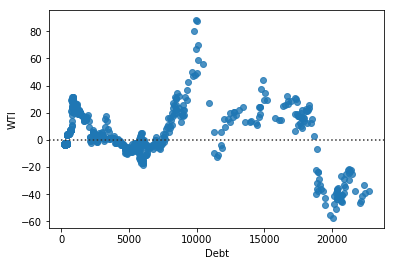

In [58]:
#
sns.residplot(econ['Debt'], econ['WTI'], robust=True)

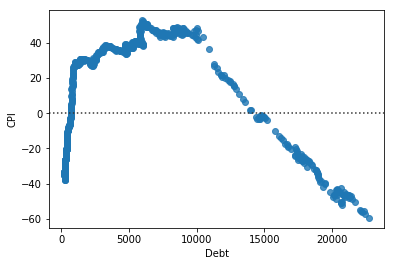

In [59]:
#
sns.residplot(econ['Debt'], econ['CPI'], robust=True)

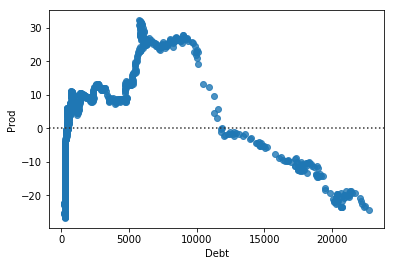

In [60]:
#
sns.residplot(econ['Debt'], econ['Prod'], robust=True)

In [61]:
#To call 5 highest Months of Oil Prices 
econ.nlargest(5, 'WTI')

,Date,WTI,CPI,Prod,Debt
737,2008-06-01,133.93,217.463,102.8445,9969.0
738,2008-07-01,133.44,219.016,102.3002,10045.5
736,2008-05-01,125.39,215.208,103.0863,9824.8
739,2008-08-01,116.61,218.690,100.7353,10134.7
735,2008-04-01,112.57,213.942,103.6704,9932.8


In [62]:
#To call 5 highest Months of Inflation
econ.nlargest(5, 'CPI')

,Date,WTI,CPI,Prod,Debt
868,2019-05-01,60.83,255.155,109.5645,22700.3
867,2019-04-01,63.86,254.958,109.1657,22346.6
866,2019-03-01,58.15,254.148,109.5985,22425.2
865,2019-02-01,54.95,253.113,109.4709,22221.4
861,2018-10-01,70.75,252.794,109.9165,21419.9


In [63]:
#To call 5 highest Months of Production
econ.nlargest(5, 'Prod')

,Date,WTI,CPI,Prod,Debt
863,2018-12-01,49.52,252.723,110.5516,22075.2
862,2018-11-01,56.96,252.760,110.5067,21683.9
864,2019-01-01,51.38,252.673,110.0907,22160.0
861,2018-10-01,70.75,252.794,109.9165,21419.9
860,2018-09-01,70.23,252.010,109.6749,21353.1


In [64]:
#To call 5 highest Months of Debt
econ.nlargest(5, 'Debt')

,Date,WTI,CPI,Prod,Debt
868,2019-05-01,60.83,255.155,109.5645,22700.3
866,2019-03-01,58.15,254.148,109.5985,22425.2
867,2019-04-01,63.86,254.958,109.1657,22346.6
865,2019-02-01,54.95,253.113,109.4709,22221.4
864,2019-01-01,51.38,252.673,110.0907,22160.0


In [65]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["WTI"]
y=econ["CPI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 2.3364144639339086
intercept 49.88460155937028
r_value 0.8392661214888023
p_value 1.2013961885785873e-231
std_err 0.05140633509958201
r-squared: 0.7043676226788571


In [66]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["WTI"]
y=econ["Prod"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.882916493611895
intercept 36.3300040766315
r_value 0.8010161611474097
p_value 2.15420852806911e-195
std_err 0.022409724128482012
r-squared: 0.6416268904193331


In [67]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["WTI"]
y=econ["Debt"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 180.15508916077238
intercept 45.277965842734375
r_value 0.8145458898057938
p_value 3.006437867111063e-207
std_err 4.357361974143156
r-squared: 0.6634850065995124


In [68]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["CPI"]
y=econ["WTI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.301473746868048
intercept -7.568515232625909
r_value 0.8392661214888023
p_value 1.2013961885785873e-231
std_err 0.0066330955806237595
r-squared: 0.7043676226788571


In [69]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["CPI"]
y=econ["Prod"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.38605318001320255
intercept 16.5901702712182
r_value 0.9750322408231151
p_value 0.0
std_err 0.002986039078698132
r-squared: 0.9506878706445452


In [70]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["CPI"]
y=econ["Debt"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 71.75613995525735
intercept -3218.3080006662767
r_value 0.9031882597022928
p_value 1.077e-320
std_err 1.1581801688906967
r-squared: 0.8157490324640563


In [71]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Prod"]
y=econ["WTI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.7267129961459007
intercept -17.34569785853188
r_value 0.8010161611474096
p_value 2.1542085280694776e-195
std_err 0.01844504874701193
r-squared: 0.6416268904193329


In [72]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Prod"]
y=econ["CPI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 2.4625826696001654
intercept -35.48339941886681
r_value 0.9750322408231153
p_value 0.0
std_err 0.01904755216807009
r-squared: 0.9506878706445456


In [73]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Prod"]
y=econ["Debt"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 168.742055047499
intercept -5297.483169239187
r_value 0.8409510303863557
p_value 1.8503979272449658e-233
std_err 3.6874795991663865
r-squared: 0.7071986355078733


In [74]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Debt"]
y=econ["WTI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.0036828546431314593
intercept 8.336699802898544
r_value 0.8145458898057938
p_value 3.006437867111063e-207
std_err 8.907620013973956e-05
r-squared: 0.6634850065995124


In [75]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Debt"]
y=econ["CPI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.011368351655659104
intercept 56.65617957995393
r_value 0.9031882597022929
p_value 1.077e-320
std_err 0.0001834909103077444
r-squared: 0.8157490324640565


In [76]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Debt"]
y=econ["Prod"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.004191004046435283
intercept 39.37181061398917
r_value 0.8409510303863557
p_value 1.8503979272449658e-233
std_err 9.158500479861811e-05
r-squared: 0.7071986355078733


## Multiple Linear Regression

In [77]:
#Introducing the 3 Month Treasury Bill
rate = pd.read_csv("3 Month Treasury Bill.txt")

In [78]:
rate.dtypes

Date     object
Rate    float64
dtype: object

In [79]:
rate['Date'] = rate['Date'].astype('datetime64[ns]')

In [80]:
display(rate.isnull().any())

Date    False
Rate    False
dtype: bool

In [81]:
econ = pd.merge(econ, rate)

In [82]:
econ.head()

,Date,WTI,CPI,Prod,Debt,Rate
0,1947-01-01,1.62,21.48,14.0679,267.0,0.38
1,1947-02-01,1.62,21.62,14.1510,268.8,0.38
2,1947-03-01,1.62,22.00,14.2341,266.7,0.38
3,1947-04-01,1.87,22.00,14.1233,265.0,0.38
4,1947-05-01,1.87,21.95,14.1787,265.7,0.38


In [83]:
econ.corr()

,WTI,CPI,Prod,Debt,Rate
WTI,1.000000,0.839266,0.801016,0.814546,-0.230122
CPI,0.839266,1.000000,0.975032,0.903188,-0.243221
Prod,0.801016,0.975032,1.000000,0.840951,-0.135257
Debt,0.814546,0.903188,0.840951,1.000000,-0.458995
Rate,-0.230122,-0.243221,-0.135257,-0.458995,1.000000


In [84]:
test_target = econ
target = test_target['Rate']
features = test_target.iloc[:,1:5]
features.head()

,WTI,CPI,Prod,Debt
0,1.62,21.48,14.0679,267.0
1,1.62,21.62,14.1510,268.8
2,1.62,22.00,14.2341,266.7
3,1.87,22.00,14.1233,265.0
4,1.87,21.95,14.1787,265.7


In [85]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=0)
regression_model = linear_model.LinearRegression().fit(X_train, y_train)

## Test
sklearn.linear_model vs. sklearn.linear_model import LinearRegression

In [86]:
#LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

1.3188398426748993
[ 0.0216513  -0.02395558  0.12730621 -0.00057784]


In [88]:
y_predtest = regressor.predict(X_test)

In [89]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predtest))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predtest))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predtest)))

Mean Absolute Error: 1.669156663330669
Mean Squared Error: 4.71191613072521
Root Mean Squared Error: 2.170694849748626


In [90]:
coeff_df = pd.DataFrame(regressor.coef_, features.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
WTI,0.021651
CPI,-0.023956
Prod,0.127306
Debt,-0.000578


In [91]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predtest})
df.head(25)

,Actual,Predicted
261,5.35,5.240025
820,0.02,-0.780040
77,2.11,3.150968
453,9.74,5.624108
571,4.48,4.450091
749,0.18,1.831344
278,6.63,5.235925
691,1.48,5.543330
844,0.89,-1.970667
345,5.96,5.396984


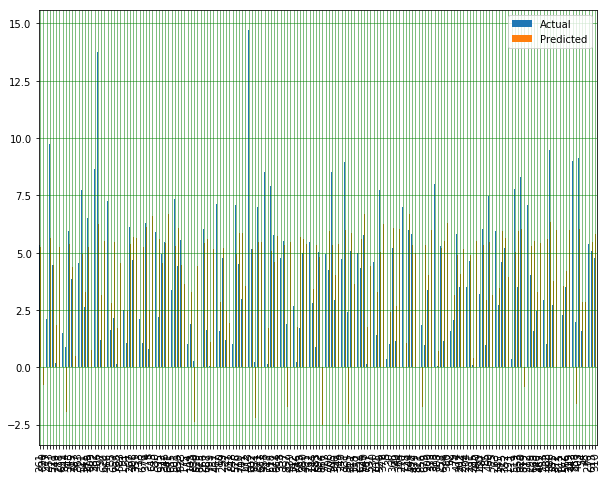

In [92]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

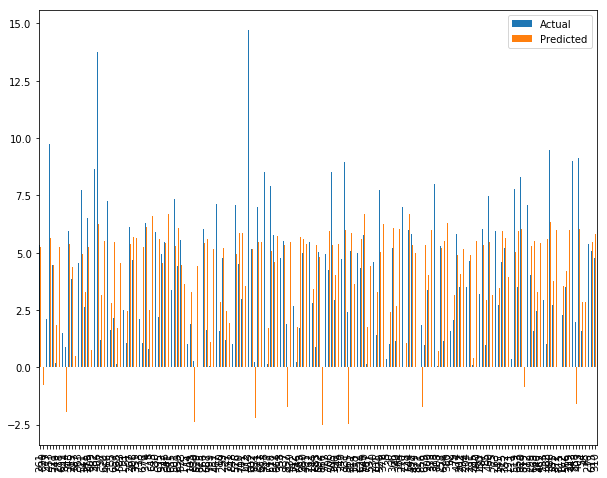

In [93]:
df.plot(kind='bar',figsize=(10,8))
plt.show()

Linear Regression Version 2

In [94]:
y_pred = regression_model.fit(X_train, y_train)
y_pred

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
regression_model.intercept_

1.3188398426748993

In [96]:
scores = cross_val_score(regression_model, features, target, cv=10)
scores

array([-3.51505803e+01, -1.94198124e+00, -1.64042128e-01, -1.63835182e-01,
       -1.57549470e+00, -4.49018142e+00,  2.38631945e-01, -5.21788383e+00,
       -5.14096234e+00, -2.50913570e+02])

In [97]:
print("The mean of the folds are", scores.mean(),"and the standard deviation is" ,scores.std())


The mean of the folds are -30.45198989659923 and the standard deviation is 74.162070913103


## LSTM Neural Network Model

In [204]:
def do_lstm_model(df, 
                  ts, 
                  look_back, 
                  epochs, 
                  type_ = None, 
                  train_fraction = 0.67):
  """
   Create LSTM model
   Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
  """
  # Import packages
  import numpy
  import matplotlib.pyplot as plt
  from pandas import read_csv
  import math
  from keras.models import Sequential
  from keras.layers import Dense
  from keras.layers import LSTM
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import mean_absolute_error

  # Convert an array of values into a dataset matrix
  def create_dataset(dataset, look_back=1):
    """
    Create the dataset
    """
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 0]
      dataX.append(a)
      dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

  # Fix random seed for reproducibility
  numpy.random.seed(7)

  # Get dataset
  dataset = df[ts].values
  dataset = dataset.astype('float32')

  # Normalize the dataset
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(dataset.reshape(-1, 1))
  
  # Split into train and test sets
  train_size = int(len(dataset) * train_fraction)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
  
  # Reshape into X=t and Y=t+1
  look_back = look_back
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)
  
  # Reshape input to be [samples, time steps, features]
  if type_ == 'regression with time steps':
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
  elif type_ == 'stacked with memory between batches':
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
  else:
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
  
  # Create and fit the LSTM network
  batch_size = 10
  model = Sequential()
  
  if type_ == 'regression with time steps':
    model.add(LSTM(4, input_shape=(look_back, 1)))
  elif type_ == 'memory between batches':
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
  elif type_ == 'stacked with memory between batches':
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
  else:
    model.add(LSTM(4, input_shape=(1, look_back)))
  
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')

  if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
    for i in range(100):
      model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
      model.reset_states()
  else:
    model.fit(trainX, 
              trainY, 
              epochs = epochs, 
              batch_size = 10, 
              verbose = 2)
  
  # Make predictions
  if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
    trainPredict = model.predict(trainX, batch_size=batch_size)
    testPredict = model.predict(testX, batch_size=batch_size)
  else:
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
  
  # Invert predictions
  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform([trainY])
  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform([testY])
  
  # Calculate root mean squared error
  trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
  print('Train Score: %.2f RMSE' % (trainScore))
  testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
  print('Test Score: %.2f RMSE' % (testScore))
  
  #Calculate Mean Absolute Error
  train_lstmMAE = (mean_absolute_error(trainY[0], trainPredict[:,0]))
  print('Train Mean Absolute Error: %.2f MAE' % (train_lstmMAE))
  test_lstmMAE = (mean_absolute_error(testY[0], testPredict[:,0]))
  print('Test Mean Absolute Error: %.2f MAE' % (test_lstmMAE))

  # Shift train predictions for plotting
  trainPredictPlot = numpy.empty_like(dataset)
  trainPredictPlot[:, :] = numpy.nan
  trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
  
  # Shift test predictions for plotting
  testPredictPlot = numpy.empty_like(dataset)
  testPredictPlot[:, :] = numpy.nan
  testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
  
  plt.plot(scaler.inverse_transform(dataset))
  plt.plot(trainPredictPlot, label='Train')
  plt.plot(testPredictPlot, label='Test')
  plt.legend()
  plt.show()
  plt.close()
  print(testPredict)

  

return

Predicting Production

Epoch 1/5
 - 9s - loss: 0.0384
Epoch 2/5
 - 0s - loss: 0.0017
Epoch 3/5
 - 0s - loss: 8.5043e-04
Epoch 4/5
 - 0s - loss: 6.0725e-04
Epoch 5/5
 - 0s - loss: 4.6481e-04
Train Score: 1.98 RMSE
Test Score: 3.55 RMSE
Train Mean Absolute Error: 1.56 MAE
Test Mean Absolute Error: 2.42 MAE


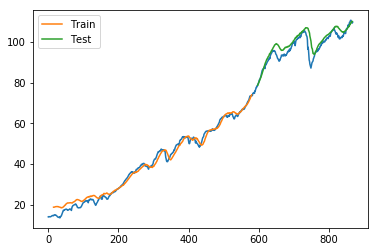

[[ 78.6292  ]
 [ 79.03232 ]
 [ 79.392525]
 [ 79.77876 ]
 [ 80.29234 ]
 [ 80.63755 ]
 [ 81.117645]
 [ 81.692924]
 [ 82.042274]
 [ 82.43743 ]
 [ 82.9319  ]
 [ 83.45736 ]
 [ 83.9153  ]
 [ 84.54495 ]
 [ 85.09688 ]
 [ 85.70373 ]
 [ 86.35297 ]
 [ 86.87893 ]
 [ 87.322266]
 [ 87.99343 ]
 [ 88.521545]
 [ 89.178635]
 [ 89.62877 ]
 [ 89.86522 ]
 [ 90.45961 ]
 [ 90.83166 ]
 [ 91.39068 ]
 [ 91.43447 ]
 [ 91.92265 ]
 [ 92.16336 ]
 [ 92.66504 ]
 [ 92.77    ]
 [ 93.030235]
 [ 93.646   ]
 [ 94.09434 ]
 [ 94.172966]
 [ 94.39262 ]
 [ 94.70273 ]
 [ 95.06924 ]
 [ 95.37912 ]
 [ 95.81593 ]
 [ 95.92098 ]
 [ 96.33221 ]
 [ 96.562645]
 [ 96.99786 ]
 [ 97.27161 ]
 [ 97.57293 ]
 [ 97.83221 ]
 [ 98.26942 ]
 [ 98.48147 ]
 [ 98.52323 ]
 [ 98.75383 ]
 [ 98.87926 ]
 [ 99.06643 ]
 [ 98.9571  ]
 [ 98.84272 ]
 [ 98.723434]
 [ 98.60647 ]
 [ 98.41393 ]
 [ 98.18117 ]
 [ 97.92799 ]
 [ 97.61679 ]
 [ 97.267746]
 [ 96.81715 ]
 [ 96.59778 ]
 [ 96.44972 ]
 [ 96.11656 ]
 [ 95.91085 ]
 [ 95.75807 ]
 [ 95.82566 ]
 [ 95.866356]
 [ 95.

In [205]:
# LSTM Network for Regression
do_lstm_model(df = econ, 
              ts = 'Prod', 
              look_back = 15, 
              epochs = 5)

# LSTM for Regression Using the Window Method
#do_lstm_model(df = econ, 
     #         ts = 'Prod', 
        #      look_back = 3, 
     #         epochs = 100)

# LSTM for Regression with Time Steps
#do_lstm_model(df = econ, 
            #  ts = 'Prod', 
            #  look_back = 3, 
            #  epochs = 100, 
            #  type_ = 'regression with time steps')

# LSTM with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
                #look_back = 3, 
                #epochs = 5, 
                #type_ = 'memory between batches')

#  Stacked LSTMs with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
               #look_back = 3, 
                #epochs = 5) 
              # Plot baseline and predictions

Predicting Debt

Epoch 1/5
 - 4s - loss: 0.0021
Epoch 2/5
 - 0s - loss: 6.2717e-04
Epoch 3/5
 - 0s - loss: 8.3695e-05
Epoch 4/5
 - 0s - loss: 2.9716e-05
Epoch 5/5
 - 0s - loss: 2.7620e-05
Train Score: 116.37 RMSE
Test Score: 2729.59 RMSE


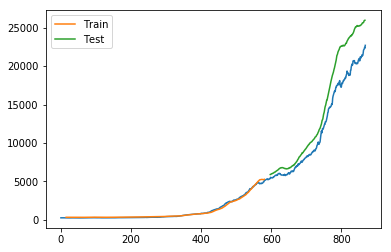

[[ 5899.606 ]
 [ 5916.9585]
 [ 5933.1885]
 [ 5978.7666]
 [ 5998.5386]
 [ 6017.3926]
 [ 6018.9946]
 [ 6048.839 ]
 [ 6084.0503]
 [ 6086.5986]
 [ 6112.455 ]
 [ 6171.0283]
 [ 6198.101 ]
 [ 6215.0967]
 [ 6219.0796]
 [ 6265.651 ]
 [ 6307.922 ]
 [ 6337.237 ]
 [ 6366.369 ]
 [ 6410.3325]
 [ 6434.601 ]
 [ 6464.426 ]
 [ 6499.0933]
 [ 6533.432 ]
 [ 6592.763 ]
 [ 6621.6313]
 [ 6680.4424]
 [ 6691.2974]
 [ 6720.241 ]
 [ 6756.0796]
 [ 6758.577 ]
 [ 6792.9746]
 [ 6778.811 ]
 [ 6796.7466]
 [ 6799.9316]
 [ 6795.597 ]
 [ 6773.215 ]
 [ 6767.8784]
 [ 6757.4663]
 [ 6717.1763]
 [ 6711.221 ]
 [ 6676.451 ]
 [ 6668.3203]
 [ 6669.604 ]
 [ 6676.8594]
 [ 6638.595 ]
 [ 6630.3936]
 [ 6638.3286]
 [ 6665.884 ]
 [ 6656.269 ]
 [ 6651.529 ]
 [ 6665.2144]
 [ 6703.328 ]
 [ 6736.087 ]
 [ 6724.6885]
 [ 6800.717 ]
 [ 6797.531 ]
 [ 6799.2104]
 [ 6796.9365]
 [ 6863.7427]
 [ 6900.488 ]
 [ 6950.6543]
 [ 6996.6226]
 [ 7028.774 ]
 [ 7064.5186]
 [ 7045.3105]
 [ 7107.4326]
 [ 7132.0625]
 [ 7195.4556]
 [ 7173.629 ]
 [ 7270.3315]
 [ 731

In [148]:
# LSTM Network for Regression
do_lstm_model(df = econ, 
              ts = 'Debt', 
              look_back = 15, 
              epochs = 5)

# LSTM for Regression Using the Window Method
#do_lstm_model(df = econ, 
            #  ts = 'Debt', 
            #  look_back = 3, 
            #  epochs = 5)

# LSTM for Regression with Time Steps
#do_lstm_model(df = econ, 
           #   ts = 'Debt', 
           #   look_back = 3, 
           #  epochs = 5, 
           #   type_ = 'regression with time steps')

# LSTM with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
                #look_back = 3, 
                #epochs = 5, 
                #type_ = 'memory between batches')

#  Stacked LSTMs with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
               #look_back = 3, 
                #epochs = 5) 

Predicting Oil Price

Epoch 1/5
 - 6s - loss: 0.0044
Epoch 2/5
 - 0s - loss: 0.0012
Epoch 3/5
 - 0s - loss: 7.8517e-04
Epoch 4/5
 - 0s - loss: 6.8889e-04
Epoch 5/5
 - 0s - loss: 6.5696e-04
Train Score: 3.32 RMSE
Test Score: 17.24 RMSE


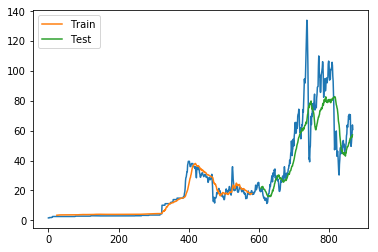

[[21.261745]
 [21.958351]
 [22.31608 ]
 [22.302101]
 [22.085917]
 [22.672838]
 [22.132349]
 [21.458258]
 [20.78052 ]
 [20.792614]
 [20.70272 ]
 [20.536491]
 [19.824867]
 [19.414095]
 [19.180931]
 [18.68055 ]
 [18.063631]
 [17.287766]
 [16.78864 ]
 [16.642155]
 [15.976626]
 [16.304934]
 [16.14795 ]
 [16.4392  ]
 [15.973554]
 [16.40048 ]
 [15.930328]
 [16.618101]
 [16.012352]
 [16.959845]
 [17.163023]
 [18.188616]
 [18.48351 ]
 [19.977865]
 [19.452568]
 [20.752424]
 [21.108223]
 [22.363823]
 [22.928556]
 [24.692148]
 [24.993536]
 [26.68636 ]
 [26.599344]
 [27.65248 ]
 [27.5215  ]
 [27.979551]
 [28.20374 ]
 [30.053381]
 [29.195137]
 [29.89598 ]
 [29.76943 ]
 [30.425705]
 [29.280972]
 [28.50468 ]
 [27.73512 ]
 [28.596704]
 [27.829065]
 [27.757639]
 [28.219446]
 [28.01962 ]
 [27.204683]
 [26.840807]
 [26.139862]
 [26.10571 ]
 [25.55065 ]
 [25.693197]
 [26.019962]
 [26.630232]
 [26.780169]
 [27.305904]
 [27.03751 ]
 [26.57483 ]
 [26.771456]
 [27.362865]
 [28.477228]
 [28.60165 ]
 [29.308634]

In [167]:
# LSTM Network for Regression
do_lstm_model(df = econ, 
              ts = 'WTI', 
              look_back = 24, 
              epochs = 5)

# LSTM for Regression Using the Window Method
#do_lstm_model(df = econ, 
      #        ts = 'WTI', 
      #        look_back = 3, 
      #        epochs = 5)

# LSTM for Regression with Time Steps
#do_lstm_model(df = econ, 
       #       ts = 'WTI', 
       #       look_back = 3, 
       #       epochs = 5, 
        #      type_ = 'regression with time steps')

# LSTM with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
                #look_back = 3, 
                #epochs = 5, 
                #type_ = 'memory between batches')

#  Stacked LSTMs with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
               #look_back = 3, 
                #epochs = 5) 

Epoch 1/5
 - 5s - loss: 0.0236
Epoch 2/5
 - 0s - loss: 0.0023
Epoch 3/5
 - 0s - loss: 7.7206e-04
Epoch 4/5
 - 0s - loss: 3.4488e-04
Epoch 5/5
 - 0s - loss: 2.4184e-04
Train Score: 3.46 RMSE
Test Score: 12.27 RMSE


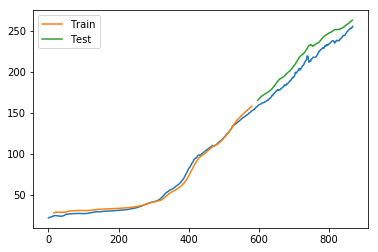

[[165.00087]
 [165.45445]
 [165.96039]
 [166.52753]
 [166.94862]
 [167.43063]
 [167.93077]
 [168.30444]
 [168.72006]
 [169.06462]
 [169.47124]
 [169.83847]
 [170.23726]
 [170.54205]
 [170.90735]
 [171.2068 ]
 [171.47615]
 [171.73643]
 [171.9763 ]
 [172.22656]
 [172.45378]
 [172.7535 ]
 [173.01077]
 [173.31248]
 [173.50829]
 [173.74472]
 [174.00203]
 [174.24194]
 [174.49849]
 [174.77927]
 [175.08931]
 [175.26236]
 [175.67845]
 [176.0128 ]
 [176.32521]
 [176.58316]
 [177.0134 ]
 [177.49875]
 [177.83333]
 [178.23198]
 [178.59447]
 [179.18744]
 [179.69514]
 [180.19534]
 [180.65994]
 [181.31212]
 [181.80348]
 [182.46243]
 [182.92929]
 [183.51743]
 [184.11316]
 [184.82155]
 [185.272  ]
 [185.89345]
 [186.40161]
 [187.13313]
 [187.62727]
 [188.11642]
 [188.74257]
 [189.35341]
 [189.59816]
 [190.14037]
 [190.67033]
 [191.05681]
 [191.05135]
 [191.43227]
 [191.82121]
 [192.12207]
 [192.22887]
 [192.45593]
 [192.82098]
 [193.00313]
 [193.13261]
 [193.47679]
 [193.92719]
 [194.23543]
 [194.6254 ]

In [151]:
# LSTM Network for Regression
do_lstm_model(df = econ, 
              ts = 'CPI', 
              look_back = 15, 
              epochs = 5)

# LSTM for Regression Using the Window Method
#do_lstm_model(df = econ, 
            #  ts = 'CPI', 
             # look_back = 3, 
             # epochs = 5)

# LSTM for Regression with Time Steps
#do_lstm_model(df = econ, 
          #    ts = 'CPI', 
           #   look_back = 3, 
           #   epochs = 5, 
           #   type_ = 'regression with time steps')

# LSTM with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'CPI', 
                #look_back = 3, 
                #epochs = 5, 
                #type_ = 'memory between batches')

#  Stacked LSTMs with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'CPI', 
               #look_back = 3, 
                #epochs = 5) 

Predicting Inflation

Epoch 1/5
 - 5s - loss: 0.0513
Epoch 2/5
 - 0s - loss: 0.0070
Epoch 3/5
 - 0s - loss: 0.0057
Epoch 4/5
 - 0s - loss: 0.0055
Epoch 5/5
 - 0s - loss: 0.0052
Train Score: 1.16 RMSE
Test Score: 0.98 RMSE


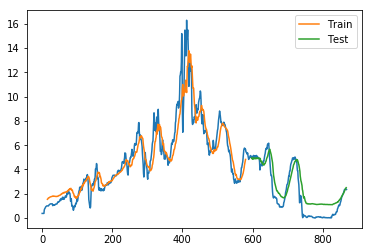

[[4.95879  ]
 [4.960325 ]
 [4.872275 ]
 [4.9032884]
 [4.868515 ]
 [4.9311633]
 [4.8804994]
 [4.9460993]
 [4.9398484]
 [4.947682 ]
 [4.8754096]
 [4.8955517]
 [4.9300632]
 [4.924153 ]
 [4.896052 ]
 [4.9078045]
 [4.9631066]
 [4.9542556]
 [4.9358068]
 [4.8897924]
 [4.9124827]
 [4.935898 ]
 [4.9135833]
 [4.888052 ]
 [4.914893 ]
 [4.907336 ]
 [4.6644874]
 [4.6656814]
 [4.619615 ]
 [4.680745 ]
 [4.5404634]
 [4.5439105]
 [4.4303474]
 [4.4437013]
 [4.404849 ]
 [4.3582563]
 [4.383117 ]
 [4.4676237]
 [4.4826913]
 [4.49656  ]
 [4.628988 ]
 [4.654586 ]
 [4.7531195]
 [4.889282 ]
 [4.959706 ]
 [5.049152 ]
 [5.095299 ]
 [5.238508 ]
 [5.3528748]
 [5.4735074]
 [5.5040903]
 [5.6184325]
 [5.673104 ]
 [5.564214 ]
 [5.4655466]
 [5.3627977]
 [5.236867 ]
 [5.0591865]
 [4.849715 ]
 [4.6851754]
 [4.5633764]
 [4.2504277]
 [3.838947 ]
 [3.5061367]
 [3.3429582]
 [3.1171808]
 [2.9395463]
 [2.8182085]
 [2.6905136]
 [2.5822747]
 [2.4194095]
 [2.300853 ]
 [2.2387571]
 [2.2362952]
 [2.2144277]
 [2.1505477]
 [2.112319 ]

In [152]:
# LSTM Network for Regression
do_lstm_model(df = econ, 
              ts = 'Rate', 
              look_back = 15, 
              epochs = 5)

# LSTM for Regression Using the Window Method
#do_lstm_model(df = econ, 
            #  ts = 'Rate', 
             # look_back = 3, 
             # epochs = 5)

# LSTM for Regression with Time Steps
#do_lstm_model(df = econ, 
          #    ts = 'Rate', 
           #   look_back = 3, 
           #   epochs = 5, 
           #   type_ = 'regression with time steps')

# LSTM with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
                #look_back = 3, 
                #epochs = 5, 
                #type_ = 'memory between batches')

#  Stacked LSTMs with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
               #look_back = 3, 
                #epochs = 5) 